# Analise Exploratória de Dados

### Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Aumentando a quantidade de colunas a ser visualizada
pd.options.display.max_columns = 99

# Definindo a paleta de cores
colors = ['#457b9d','#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#EE9B00', '#CA6702', '#BB3E03', '#AE2012', '#9B2226']
sns.set_palette(colors)

---

## Tabela `clinics`

A tabela clinics contém informações sobre as clínicas cadastradas e alguns marcos temporais delas, como trial e credenciamento.

In [3]:
df_clinics = pd.read_csv('../data/raw/clinics.csv')

df_clinics.head()

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,...,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT
0,8993,2023-08-01 06:25:16.121,Independente,False,Inbound,"[""bnpl"", ""finance_management"", ""patients_manag...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2,8995,2023-08-01 06:59:23.156,Independente,False,Inbound,"[""bnpl""]",Apenas BNPL,True,True,False,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
3,8996,2023-08-01 08:03:38.557,Independente,False,Inbound,"[""calendar"", ""bnpl"", ""patients_management"", ""f...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
4,8997,2023-08-01 08:34:33.894,Independente,False,Inbound,"[""patients_management""]",Apenas SaaS,False,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Tabela: clinics')
print('Quantidade de registros:', df_clinics.shape[0])
print('Quantidade de variáveis:', df_clinics.shape[1])

Tabela: clinics
Quantidade de registros: 2219
Quantidade de variáveis: 33


Vamos observar os tipos dos dados e sua contagem de nulos

In [5]:
df_clinics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   CLINIC_ID                                   2219 non-null   int64 
 1   CLINIC_CREATED_AT                           2219 non-null   object
 2   BUSINESS_SEGMENTATION                       2219 non-null   object
 3   IS_CHAIN_CLINIC                             2219 non-null   bool  
 4   FIRST_USER_HUBSPOT_SOURCE                   2219 non-null   object
 5   INTEREST_REASONS                            2066 non-null   object
 6   INTEREST_CATEGORY_SIGNUP                    2219 non-null   object
 7   HAS_INTEREST_BNPL                           2219 non-null   bool  
 8   HAS_INTEREST_BNPL_ONLY                      2219 non-null   bool  
 9   HAS_INTEREST_SAAS                           2219 non-null   bool  
 10  TRIAL_DURATION          

In [6]:
# Alterando o tipo de dados dos campos de data para datetime

df_clinics['CLINIC_CREATED_AT'] = pd.to_datetime(df_clinics['CLINIC_CREATED_AT'])
df_clinics['TRIAL_START_DATE'] = pd.to_datetime(df_clinics['TRIAL_START_DATE'])
df_clinics['TRIAL_END_DATE'] = pd.to_datetime(df_clinics['TRIAL_END_DATE'])
df_clinics['REQUEST_FINISHED_AT'] = pd.to_datetime(df_clinics['REQUEST_FINISHED_AT'])
df_clinics['ACCREDITATION_REQUESTED_AT'] = pd.to_datetime(df_clinics['ACCREDITATION_REQUESTED_AT'])
df_clinics['ACCREDITATION_APPROVED_AT'] = pd.to_datetime(df_clinics['ACCREDITATION_APPROVED_AT'])
df_clinics['ACCREDITATION_REJECTED_AT'] = pd.to_datetime(df_clinics['ACCREDITATION_REJECTED_AT'])

In [7]:
round(df_clinics.isna().sum() * 100 / len(df_clinics), 2)

CLINIC_ID                                      0.00
CLINIC_CREATED_AT                              0.00
BUSINESS_SEGMENTATION                          0.00
IS_CHAIN_CLINIC                                0.00
FIRST_USER_HUBSPOT_SOURCE                      0.00
INTEREST_REASONS                               6.89
INTEREST_CATEGORY_SIGNUP                       0.00
HAS_INTEREST_BNPL                              0.00
HAS_INTEREST_BNPL_ONLY                         0.00
HAS_INTEREST_SAAS                              0.00
TRIAL_DURATION                                 0.00
TRIAL_START_DATE                               0.00
TRIAL_END_DATE                                 0.00
TRIAL_START_HOUR                               0.00
TRIAL_START_HOUR_CATEGORY                      0.00
TRIAL_START_DAY_OF_WEEK                        0.00
TRIAL_START_DAY_OF_WEEK_CATEGORY               0.00
HAS_USER_CREATED                               0.00
MARKETING_ATTRIBUITION                         0.00
MARKETING_AT

Podemos observar que temos grandes quantidade de nulos nas colunas:

- `MARKETING_ATTRIBUITION_CAMPAIGN`, `MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT`, `MARKETING_ATTRIBUITION_AD_GROUP`: O que significa que não foi atribuido nenhuma campanha de marketing ao registro das clínica.

- `CLINIC_ACCREDITATION_STATUS`, `REQUEST_FINISHED_AT`, `ACCREDITATION_REQUESTED_AT`, `ACCREDITATION_APPROVED_AT`, `ACCREDITATION_REJECTED_AT`: O que significa uma ausência de adesão ao BNPL.

#### `CLINIC_ID`

In [8]:
# Verificando se há valores duplicados para o identificador único

df_clinics['CLINIC_ID'].duplicated().sum()

0

Não há nenhum problema com registros duplicados em nosso dataset.

In [9]:
df_clinics['CLINIC_ID'].count()

2219

Logo, a quantidade de IDs se equivale ao número total de registros.

#### `CLINIC_CREATED_AT`

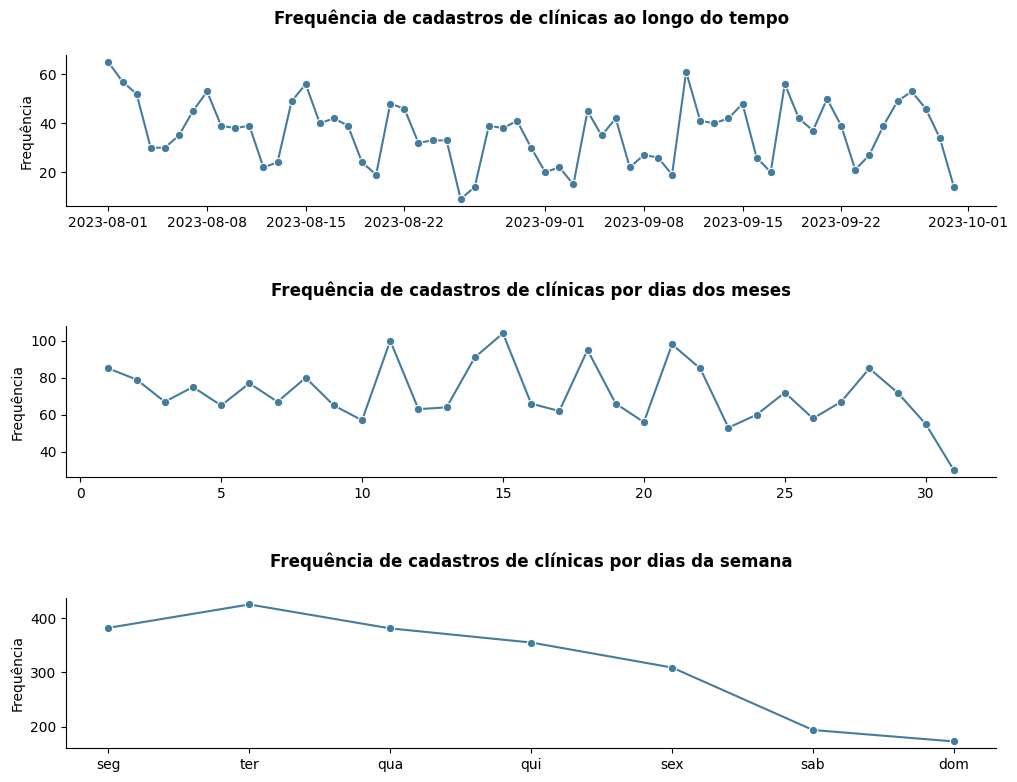

In [10]:
# Criando uma Series com o formato data.
date_counts = df_clinics['CLINIC_CREATED_AT'].dt.date
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9))
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Frequência')
ax1.set_title('Frequência de cadastros de clínicas ao longo do tempo', fontsize=12, fontweight='bold', y=1.15)
sns.despine(right=True)

# Criando uma Series com o formato data.
date_counts = df_clinics['CLINIC_CREATED_AT'].dt.day
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Frequência')
ax2.set_title('Frequência de cadastros de clínicas por dias dos meses', fontsize=12, fontweight='bold', y=1.15)
sns.despine(right=True)

# Criando uma Series com o formato data.
date_counts = df_clinics['CLINIC_CREATED_AT'].dt.weekday
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax3)
ax3.set_xlabel('')
ax3.set_xticks(ticks=[0,1,2,3,4,5,6], labels=['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom'])
ax3.set_ylabel('Frequência')
ax3.set_title('Frequência de cadastros de clínicas por dias da semana', fontsize=12, fontweight='bold', y=1.15)
sns.despine(right=True)

plt.subplots_adjust(hspace=0.8)
plt.show()

Podemos observar que há dias com picos de cadastros, o que pode ser relacionado há ações de marketing.

E percebemos que recebemos mais cadastros de clínicas no começo da semana.

#### `BUSINESS_SEGMENTATION`

Variável que indica o segmento de negócio ao qual a clínica pertence.

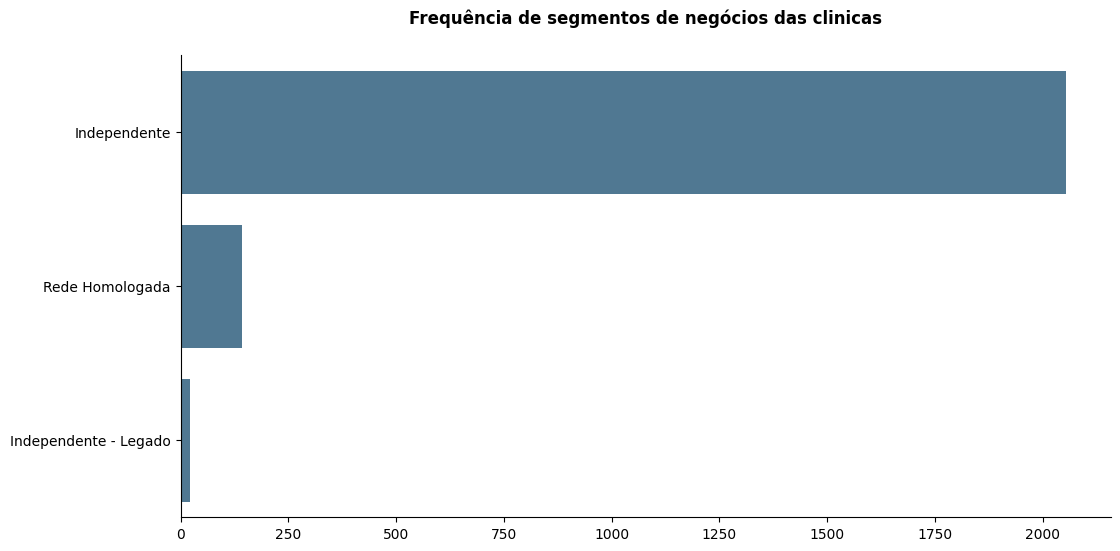

In [11]:
# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_clinics, y='BUSINESS_SEGMENTATION')
plt.title('Frequência de segmentos de negócios das clinicas', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')
sns.despine(right=True)

A maior parcela de nossas clínicas são independentes.

De acordo com o que foi pedido anteriormente, somente as clínicas independentes devem fazer parte do nosso dataset a ser analisado, farei esse tratamento ao final desse notebook.

#### `IS_CHAIN_CLINIC`

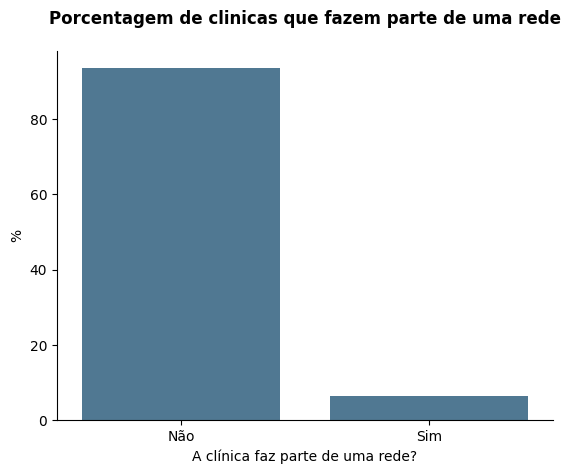

In [12]:
percentages = df_clinics['IS_CHAIN_CLINIC'].value_counts(normalize=True) * 100

# Plotando
ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.title('Porcentagem de clinicas que fazem parte de uma rede', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('A clínica faz parte de uma rede?')
plt.ylabel('%')
plt.xticks(ticks=[False, True], labels=['Não', 'Sim'])

sns.despine(right=True)
plt.show()

Como já era esperado, a maior parte do nosso dataset não faz parte de uma rede. Essa variável é altamente correlacionada com `BUSINESS_SEGMENTATION`

#### `FIRST_USER_HUBSPOT_SOURCE`

Agora, vamos observar a distribuição das fontes de aquisição

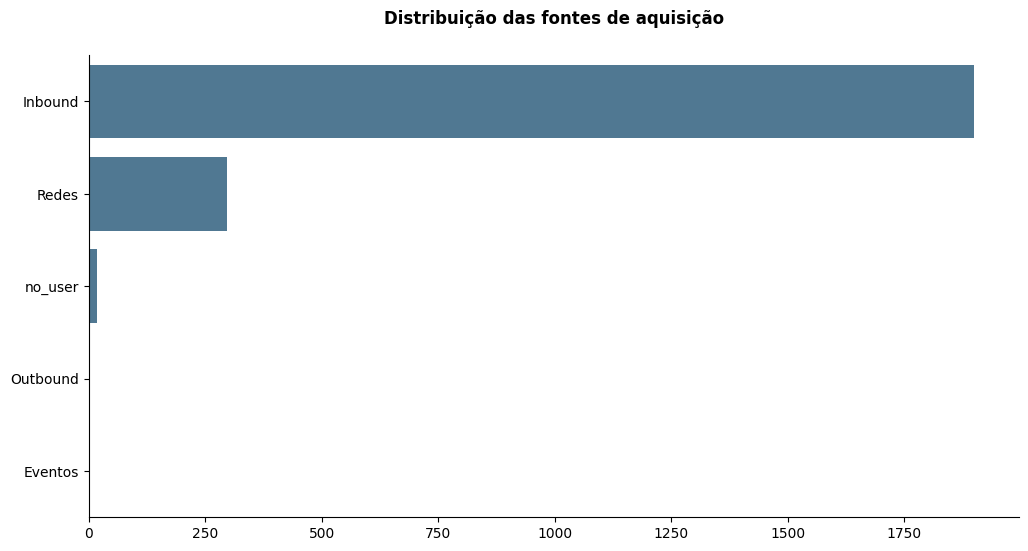

In [13]:
# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_clinics, y='FIRST_USER_HUBSPOT_SOURCE')
plt.title('Distribuição das fontes de aquisição', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

É notório que a categoria "Inbound" é mais eficaz que as demais. O que significa que as clínicas estão em maior parte conhecendo a Real por meio de iniciativas de marketing, conteúdo ou interações iniciadas pelo próprio cliente potencial.

#### `INTEREST_REASONS`

Antes de observar a frequência de motivos de interesse, precisamos tratar os valores nulos e desconhecidos de nossa variável.

In [14]:
# Foi observado que os valores nulos são valores desconhecidos, assim como na caracteristica INTEREST_CATEGORY_SIGNUP
df_clinics['INTEREST_REASONS'].fillna('Desconhecido', inplace=True)

# Também existe um valor '[]', que se encaixa na mesma categoria
df_clinics['INTEREST_REASONS'].replace('[]', 'Desconhecido', inplace=True)

C:\Users\msant\AppData\Local\Temp\ipykernel_13156\2948088805.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clinics['INTEREST_REASONS'].fillna('Desconhecido', inplace=True)


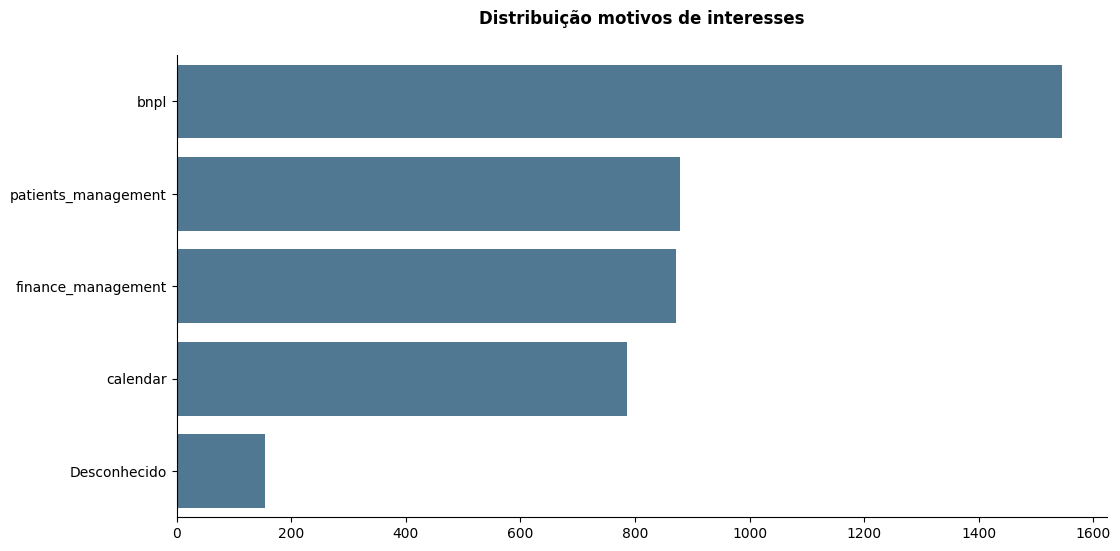

In [15]:
# Formatando a serie
dados_desaninhada = df_clinics['INTEREST_REASONS'].str.strip('[]').str.replace('"', '').str.split(', ')
dados_desaninhada = pd.Series([item for sublist in dados_desaninhada for item in sublist])
dados_desaninhada = dados_desaninhada.value_counts().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(12,6))
sns.barplot(y=dados_desaninhada.index, x=dados_desaninhada.values)
plt.title('Distribuição dos motivos de interesses', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

O principal motivo de atração das clínicas é o Financiamento Real (BNPL), seguido das funcionalidades de gerenciamento.

#### `INTEREST_CATEGORY_SIGNUP`

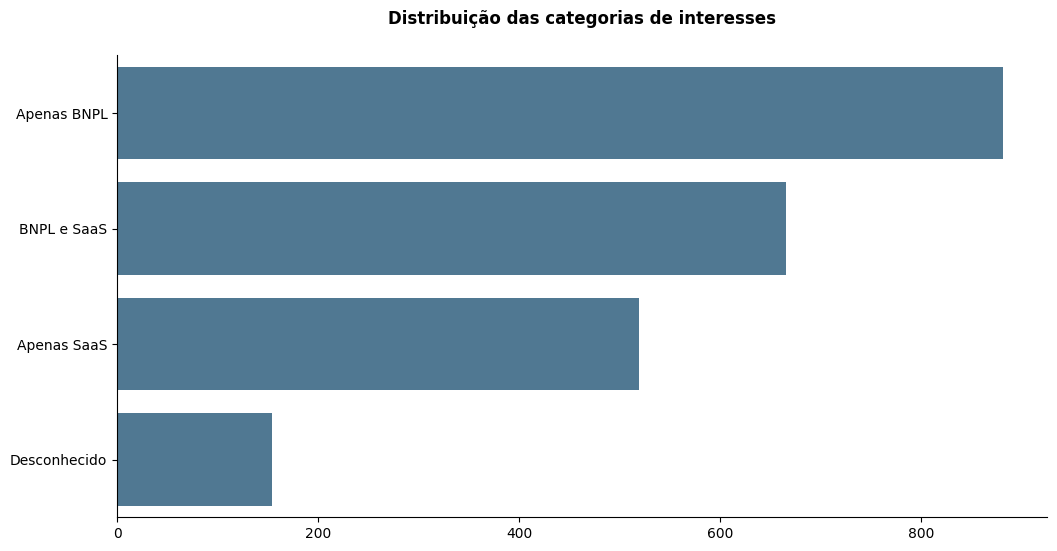

In [16]:
# Criando uma serie ordenada
order = df_clinics['INTEREST_CATEGORY_SIGNUP'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(data=df_clinics, y='INTEREST_CATEGORY_SIGNUP', order=order)
plt.title('Distribuição das categorias de interesses', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

Com os gráficos de `INTEREST_REASONS` e `INTEREST_CATEGORY_SIGNUP`, podemos concluir que o BNPL é o principal atrativo da Real.

#### `TRIAL_DURATION`

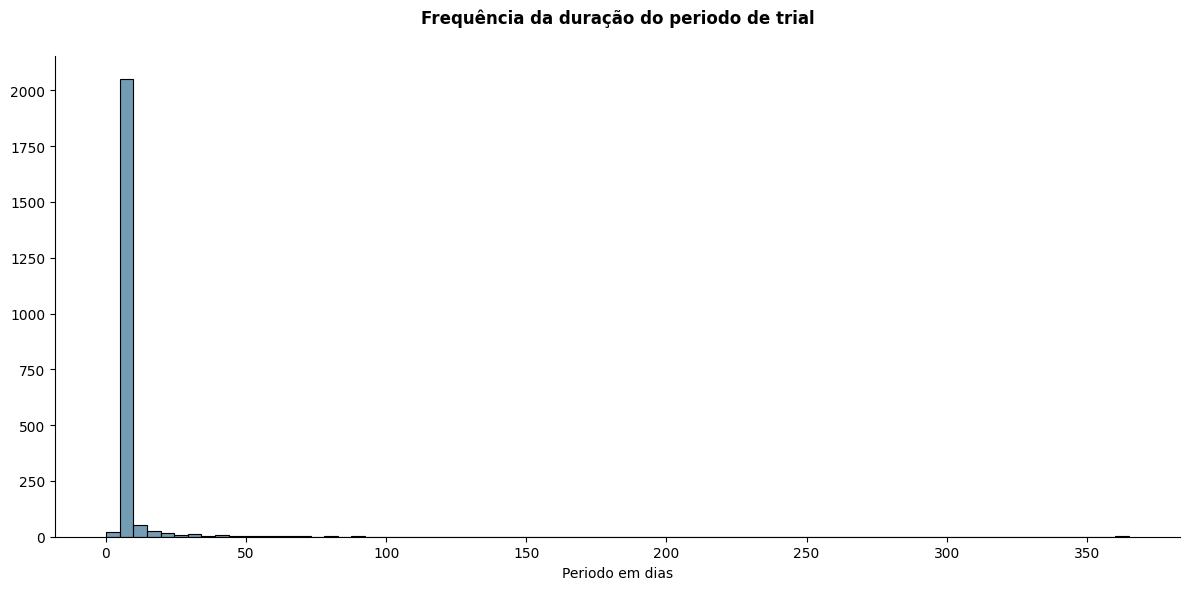

In [17]:
# Plotando
plt.figure(figsize=(12,6))
sns.histplot(df_clinics, x='TRIAL_DURATION', bins=75)
plt.title('Frequência da duração do periodo de trial', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('Periodo em dias')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()
plt.show()

In [18]:
df_clinics['TRIAL_DURATION'].describe()

count    2219.000000
mean        8.388463
std        12.314432
min         0.000000
25%         7.000000
50%         7.000000
75%         7.000000
max       365.000000
Name: TRIAL_DURATION, dtype: float64

A duração de trial da Real segue o padrão de 7 dias, como demonstra grande maioria dos dados (75%).

#### `MARKETING_ATTRIBUITION`

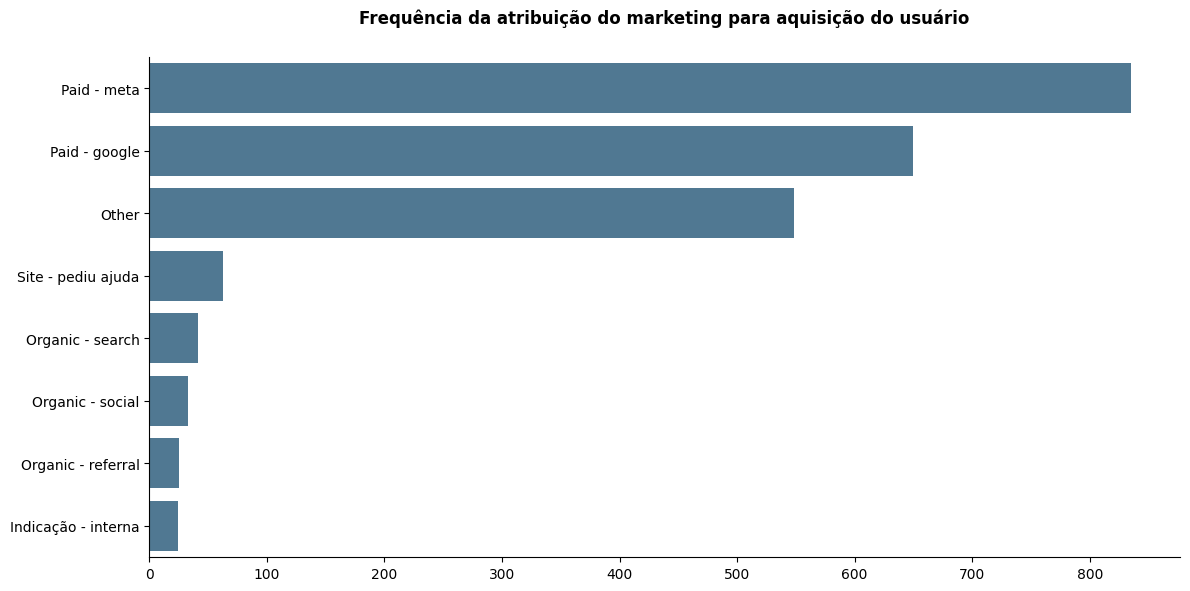

In [19]:
# Criando uma serie ordenada
order = df_clinics['MARKETING_ATTRIBUITION'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_clinics, y='MARKETING_ATTRIBUITION', order=order)
plt.title('Frequência da atribuição do marketing para aquisição do usuário', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')
sns.despine(right=True)

plt.tight_layout()
plt.show()

#### `MARKETING_ATTRIBUITION_CHANNEL_GROUP`

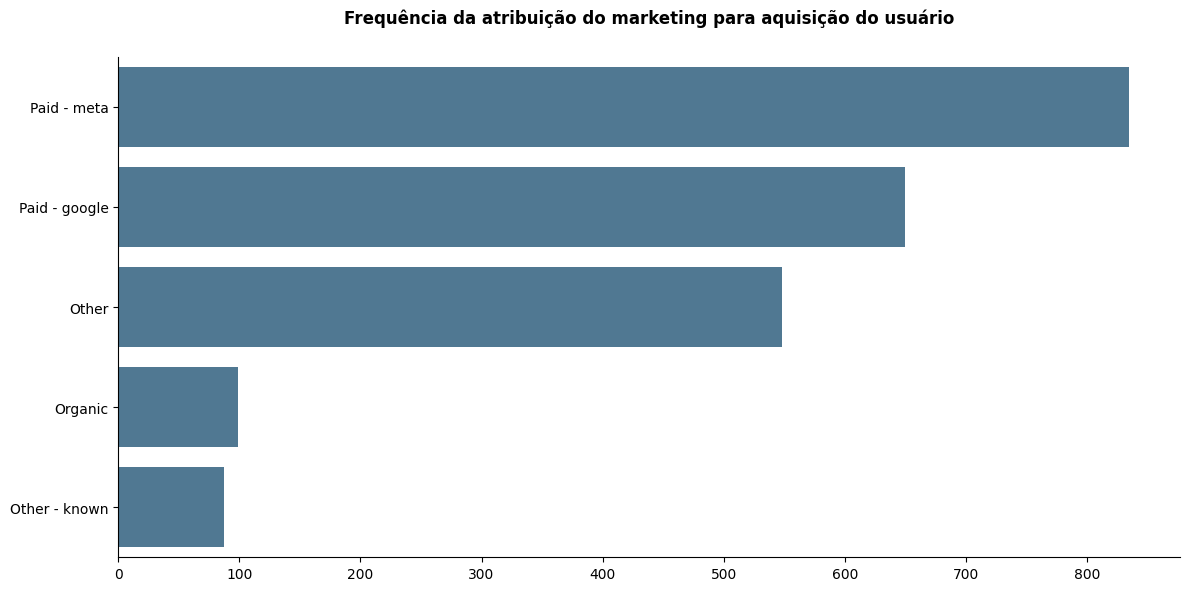

In [20]:
# Criando uma serie ordenada
order = df_clinics['MARKETING_ATTRIBUITION_CHANNEL_GROUP'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_clinics, y='MARKETING_ATTRIBUITION_CHANNEL_GROUP', order=order)
plt.title('Frequência da atribuição do marketing para aquisição do usuário', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()
plt.show()

Os gráfico mostram que as campanhas pagas de marketing vem surtindo bastante efeito.

#### `HAS_ASKED_FOR_ACCREDITATION`

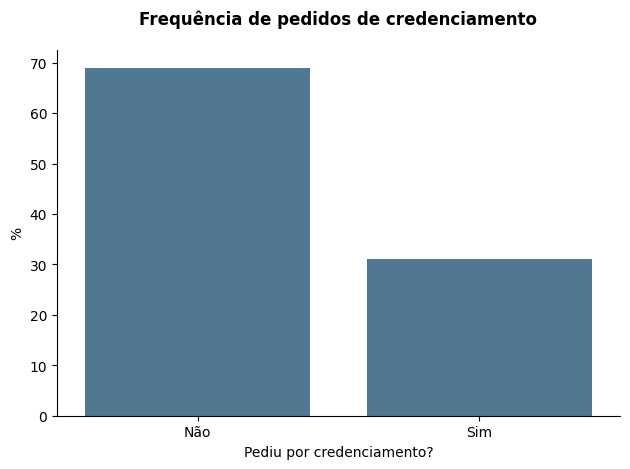

In [21]:
percentages = df_clinics['HAS_ASKED_FOR_ACCREDITATION'].value_counts(normalize=True) * 100

# Plotando
ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.title('Frequência de pedidos de credenciamento', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('Pediu por credenciamento?')
plt.ylabel('%')
plt.xticks(ticks=[False, True], labels=['Não', 'Sim'])

sns.despine(right=True)
plt.tight_layout()
plt.show()

Aproximadamente pouco mais de 30% das clínicas cadastradas já fizeram a tentativa de credenciamento.

#### `CLINIC_ACCREDITATION_STATUS`

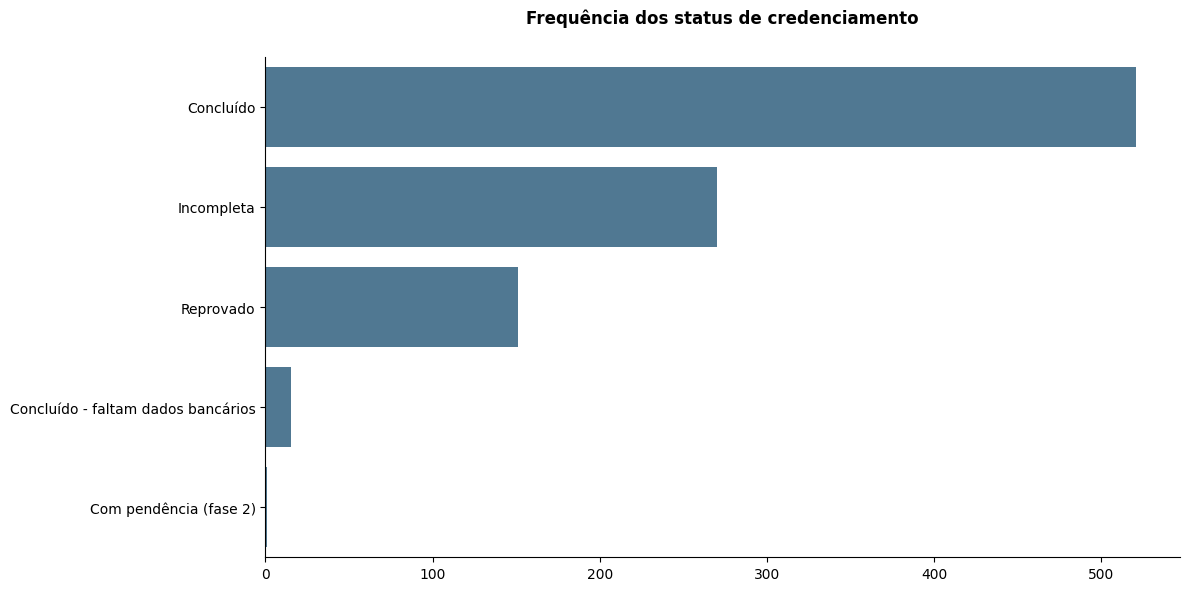

In [22]:
# Criando uma serie ordenada
order = df_clinics['CLINIC_ACCREDITATION_STATUS'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_clinics, y='CLINIC_ACCREDITATION_STATUS', order=order)
plt.title('Frequência dos status de credenciamento', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()

Podemos notar que apesar da maioria dos credenciamentos serem concluidos, há grande parte que não finaliza o processo.

---

## Tabela `activity`

A tabela activity registra todas as atividades realizadas pela clínica, contendo registros temporais de quando a clínica desempenhou uma determinada ação.

In [59]:
df_activity = pd.read_csv('../data/raw/activity.csv')

df_activity.head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,patient,False,False,True,True,True,False
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,patient,False,False,False,False,True,False
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False


In [24]:
print('Tabela: activity')
print('Quantidade de linhas:', df_activity.shape[0])
print('Quantidade de colunas:', df_activity.shape[1])

Tabela: activity
Quantidade de linhas: 13941
Quantidade de colunas: 12


Vamos observar os tipos dos dados e sua contagem de nulos

In [25]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13941 entries, 0 to 13940
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLINIC_ID               13941 non-null  int64 
 1   ACTIVITY_AT             13941 non-null  object
 2   ACTIVITY_TYPE           13941 non-null  object
 3   FEATURE                 13941 non-null  object
 4   MODULE                  13941 non-null  object
 5   ANALYTICS_DOMAIN        13941 non-null  object
 6   IS_TRANSACTION          13941 non-null  bool  
 7   IS_BNPL_ACTIVITY        13941 non-null  bool  
 8   IS_VALID_ACTIVITY       13941 non-null  bool  
 9   IS_DELETION_ACTIVITY    13941 non-null  bool  
 10  IS_MANAGEMENT_ACTIVITY  13941 non-null  bool  
 11  IS_FINANCE_ACTIVITY     13941 non-null  bool  
dtypes: bool(6), int64(1), object(5)
memory usage: 735.3+ KB


In [26]:
# Alterando o tipo de dados dos campos de data para datetime

df_activity['ACTIVITY_AT'] = pd.to_datetime(df_activity['ACTIVITY_AT'])

In [27]:
round(df_activity.isna().sum() * 100 / len(df_activity), 2)

CLINIC_ID                 0.0
ACTIVITY_AT               0.0
ACTIVITY_TYPE             0.0
FEATURE                   0.0
MODULE                    0.0
ANALYTICS_DOMAIN          0.0
IS_TRANSACTION            0.0
IS_BNPL_ACTIVITY          0.0
IS_VALID_ACTIVITY         0.0
IS_DELETION_ACTIVITY      0.0
IS_MANAGEMENT_ACTIVITY    0.0
IS_FINANCE_ACTIVITY       0.0
dtype: float64

#### `CLINIC_ID`

In [28]:
df_activity['CLINIC_ID'].duplicated().sum()

12871

Diferente da tabela `clinics` o ID não é um valor único para cada registro, ou seja, uma clínica poderá fazer várias atividades durante seu periodo de trial.

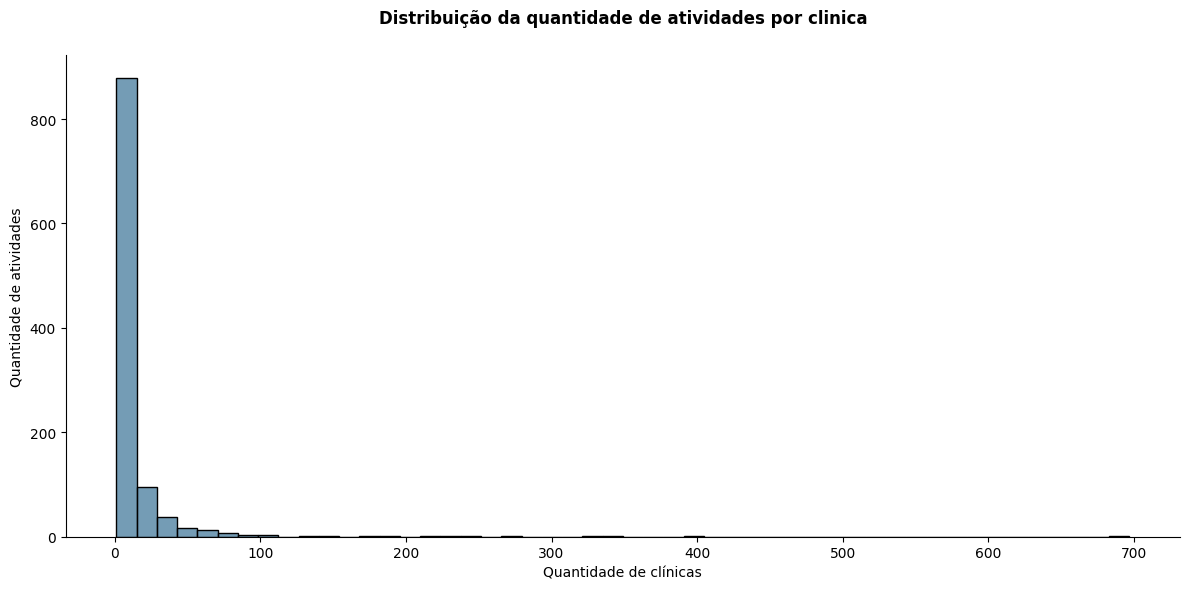

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df_activity, x=df_activity.groupby('CLINIC_ID')['CLINIC_ID'].value_counts(), bins=50)
plt.title('Distribuição da quantidade de atividades por clinica', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('Quantidade de clínicas')
plt.ylabel('Quantidade de atividades')

sns.despine(right=True)
plt.tight_layout()
plt.show()

In [30]:
df_activity.groupby('CLINIC_ID')['CLINIC_ID'].value_counts().describe()

count    1070.000000
mean       13.028972
std        36.673312
min         1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max       697.000000
Name: count, dtype: float64

Essas informações nos mostram que temos 1070 clinicas diferentes que realizaram algum tipo de atividade no perido de agosto a outubro de 2023.

A mediana de 5 atividades registradas por clínica e a média de 13 nos indica que temos um alto número de outliers, o que o gráfico de distribuição confirma pela sua cauda a direita.

#### `ACTIVITY_AT`

Vamos criar três gráficos para tentar extrair insights.

O primeiro gráfico vai nos mostrar a frequencia de atividades ao longo do périodo do nosso dataset

O segundo gráfico vai nos mostrar a frequência de atividades nos dias dos meses

O terceiro e ultimo gráfico vai nos mostrar a frêquencia de atividades nos dias da semana

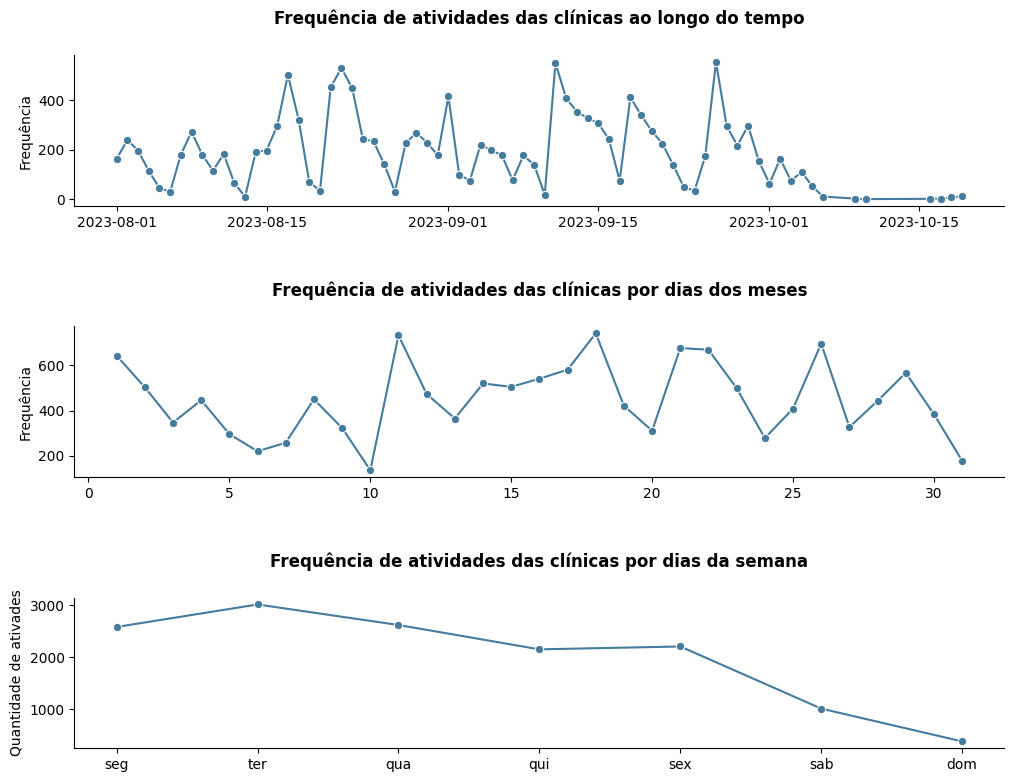

In [31]:
# Criando uma Series com o formato data.
date_counts = df_activity['ACTIVITY_AT'].dt.date
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9))
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax1)
ax1.set_title('Frequência de atividades das clínicas ao longo do tempo', fontsize=12, fontweight='bold', y=1.15)
ax1.set_xlabel('')
ax1.set_ylabel('Frequência')
sns.despine(right=True)

# Criando uma Series com o formato data.
date_counts = df_activity['ACTIVITY_AT'].dt.day
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax2)
ax2.set_title('Frequência de atividades das clínicas por dias dos meses', fontsize=12, fontweight='bold', y=1.15)
ax2.set_xlabel('')
ax2.set_ylabel('Frequência')
sns.despine(right=True)

# Criando uma Series com o formato data.
date_counts = df_activity['ACTIVITY_AT'].dt.weekday
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax3)
ax3.set_title('Frequência de atividades das clínicas por dias da semana', fontsize=12, fontweight='bold', y=1.15)
ax3.set_xlabel('')
ax3.set_xticks(ticks=[0,1,2,3,4,5,6], labels=['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom'])
ax3.set_ylabel('Quantidade de ativades')
sns.despine(right=True)

plt.subplots_adjust(hspace=0.8)
plt.show()

Não é possivel observar um padrão bem definido nos dois primeiros gráficos, porem é possivel notar uma redução nas atividades ao passar da semana no ultimo gráfico.

#### `ACTIVITY_TYPE`

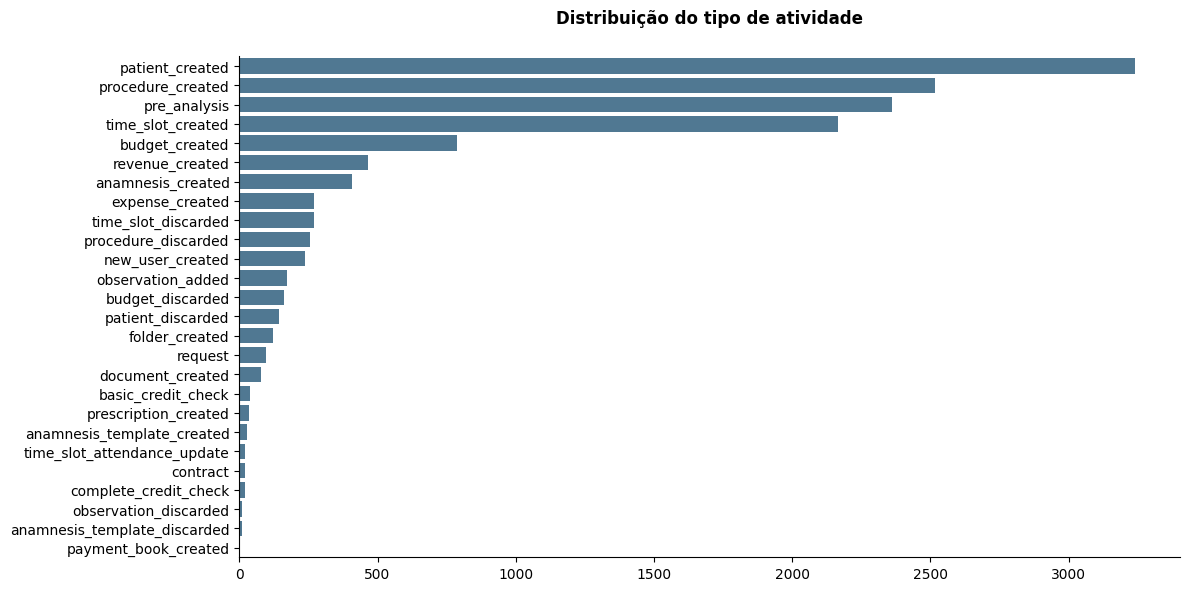

In [32]:
# Criando uma serie ordenada
order = df_activity['ACTIVITY_TYPE'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_activity, y='ACTIVITY_TYPE', order=order)
plt.title('Distribuição do tipo de atividade', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()

O gráfico de distribuição de tipo de atividades nos mostra as atividades mais comuns, dentre elas podemos notar que as quatro primeiras atividades ("patient_created", "procedure_created", "pre_analysis" e "time_slot_create") constitui a grande parte de nosso dataset.

#### `FEATURE`

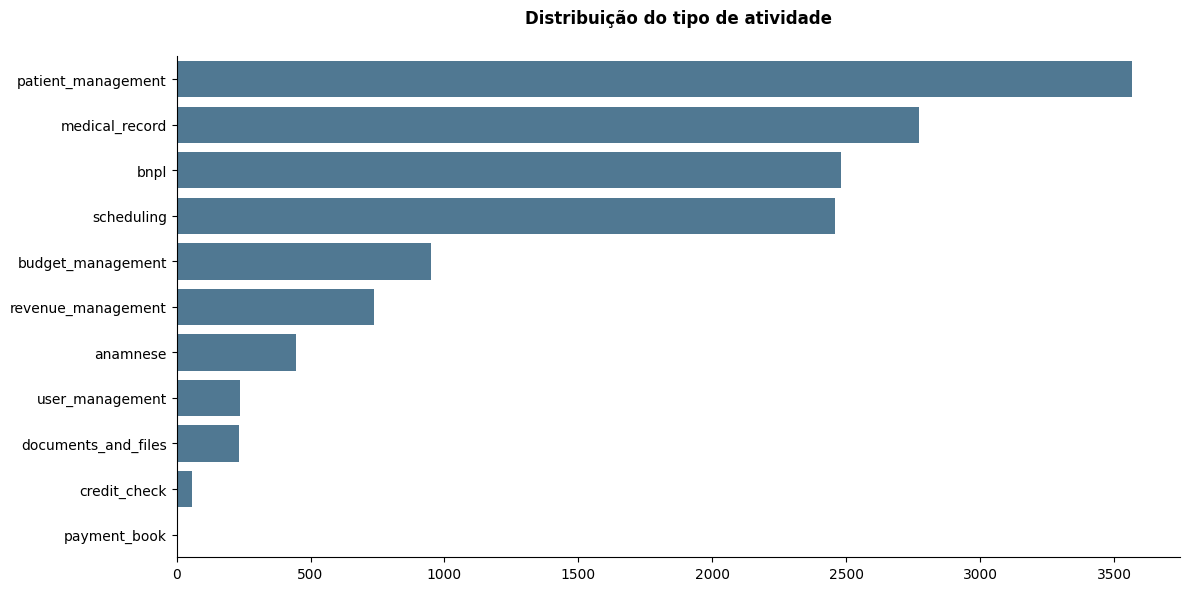

In [33]:
# Criando uma serie ordenada
order = df_activity['FEATURE'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_activity, y='FEATURE', order=order)
plt.title('Distribuição do tipo de atividade', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()

Temos 4 funcionalidades que mais são utilizadas: "patient_management", "medical_record", "bnpl" e "scheduling"

#### `MODULE`

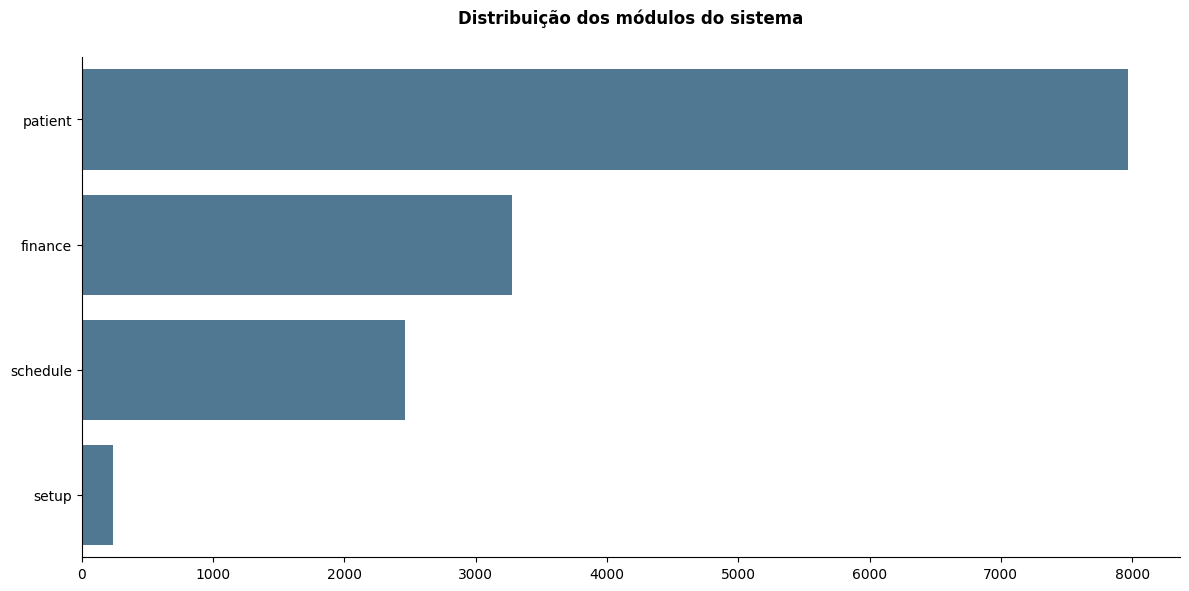

In [34]:
# Criando uma serie ordenada
order = df_activity['MODULE'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_activity, y='MODULE', order=order)
plt.title('Distribuição dos módulos do sistema', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()

Podemos notar que a área mais utilizada do nosso sistema é a de paciente.

#### `ANALYTICS_DOMAIN`

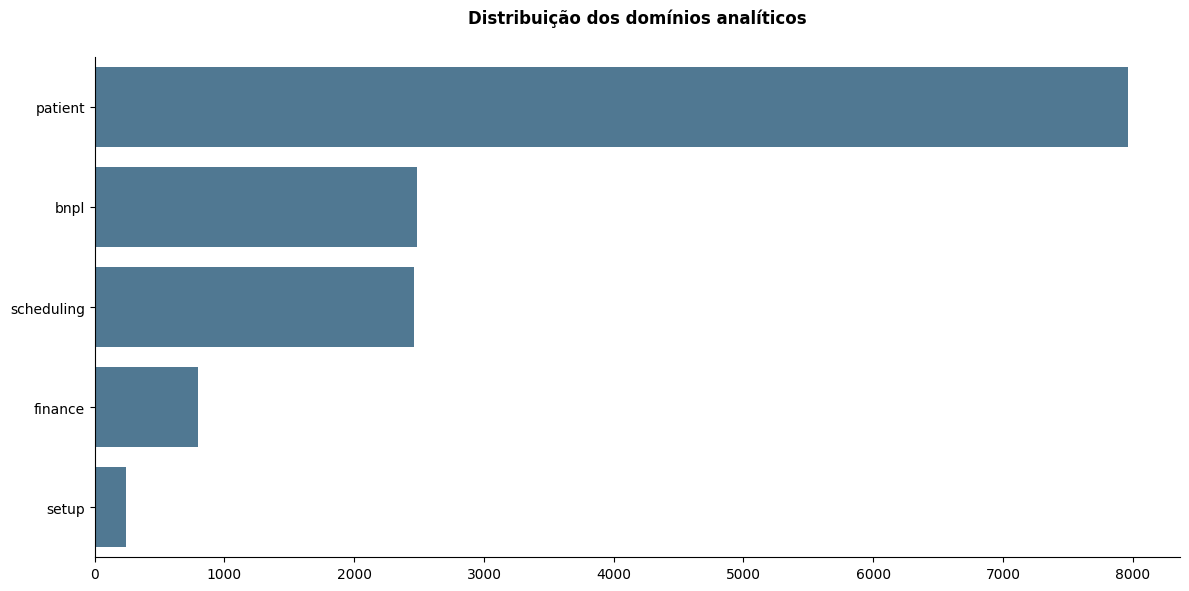

In [35]:
# Criando uma serie ordenada
order = df_activity['ANALYTICS_DOMAIN'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_activity, y='ANALYTICS_DOMAIN', order=order)
plt.title('Distribuição dos domínios analíticos', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()

---

## Tabela `subscriptions`

A tabela subscriptions contém informações de assinaturas de clínicas. A assinatura é definida como o início de um esquema de pagamentos recorrentes, possuindo início, data de fim (caso tenha sido encerrada) e a recorrência de pagamentos. Se uma clínica começar uma assinatura, encerrar ela e depois voltar a ser assinante, ela terá múltiplas linhas de assinatura.

In [60]:
df_subscriptions = pd.read_csv('../data/raw/subscriptions.csv')

df_subscriptions.head()

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
0,9000,sub_1NaOxzCpjOdJI4gTfqZ2epGB,2023-08-01,2023-10-01,2023-09-01 17:14:51.000,2023-10-01 17:14:51.000,2023-09-01 17:16:49.000,2023-09-01 18:17:14.000,complete,canceled,1.0,Cartão de Crédito,mastercard,89.9,NaN,NaN,NaN,NaN
1,9032,sub_1Namy7CpjOdJI4gTzrxPLlFg,2023-08-02,NaN,2023-10-02 18:52:35.000,2023-11-02 18:52:35.000,2023-10-02 18:53:31.000,2023-08-09 10:20:45.000,complete,past_due,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
2,9105,sub_1NalRdCpjOdJI4gTFRPqMhcv,2023-08-02,NaN,2023-10-02 17:14:57.000,2023-11-02 17:14:57.000,2023-10-02 17:16:56.000,2023-10-02 18:22:04.000,complete,active,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
3,9027,sub_1Nb3CECpjOdJI4gTFLOepcZD,2023-08-03,2023-09-03,2023-08-03 12:12:14.000,2023-09-03 12:12:14.000,2023-08-03 12:12:14.000,2023-08-03 12:12:16.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
4,9072,sub_1Nb7E2CpjOdJI4gTsIJIy9b1,2023-08-03,2023-09-03,2023-08-03 16:30:22.000,2023-09-03 16:30:22.000,2023-08-03 16:30:22.000,2023-08-03 16:30:24.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN


In [37]:
print('Tabela: subscription')
print('Quantidade de linhas:', df_subscriptions.shape[0])
print('Quantidade de colunas:', df_subscriptions.shape[1])

Tabela: subscription
Quantidade de linhas: 385
Quantidade de colunas: 18


In [38]:
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CLINIC_ID                               385 non-null    int64  
 1   STRIPE_SUBSCRIPTION_ID                  385 non-null    object 
 2   SUBSCRIPTION_START_DATE                 384 non-null    object 
 3   SUBSCRIPTION_END_DATE                   46 non-null     object 
 4   SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT  385 non-null    object 
 5   SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT     385 non-null    object 
 6   MOST_RECENT_INVOICE_CREATED_AT          385 non-null    object 
 7   LAST_PAYMENT_AT                         371 non-null    object 
 8   CHECKOUT_STATUS                         383 non-null    object 
 9   SUBSCRIPTION_STATUS                     383 non-null    object 
 10  BILLING_INTERVAL_IN_MONTHS              384 non-null    float6

In [39]:
# Alterando o tipo de dados dos campos de data para datetime

df_subscriptions['SUBSCRIPTION_START_DATE'] = pd.to_datetime(df_subscriptions['SUBSCRIPTION_START_DATE'])
df_subscriptions['SUBSCRIPTION_END_DATE'] = pd.to_datetime(df_subscriptions['SUBSCRIPTION_END_DATE'])
df_subscriptions['SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT'] = pd.to_datetime(df_subscriptions['SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT'])
df_subscriptions['SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT'] = pd.to_datetime(df_subscriptions['SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT'])
df_subscriptions['MOST_RECENT_INVOICE_CREATED_AT'] = pd.to_datetime(df_subscriptions['MOST_RECENT_INVOICE_CREATED_AT'])
df_subscriptions['LAST_PAYMENT_AT'] = pd.to_datetime(df_subscriptions['LAST_PAYMENT_AT'])

In [40]:
round(df_subscriptions.isna().sum() * 100 / len(df_subscriptions), 2)

CLINIC_ID                                   0.00
STRIPE_SUBSCRIPTION_ID                      0.00
SUBSCRIPTION_START_DATE                     0.26
SUBSCRIPTION_END_DATE                      88.05
SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT      0.00
SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT         0.00
MOST_RECENT_INVOICE_CREATED_AT              0.00
LAST_PAYMENT_AT                             3.64
CHECKOUT_STATUS                             0.52
SUBSCRIPTION_STATUS                         0.52
BILLING_INTERVAL_IN_MONTHS                  0.26
FIRST_PAYMENT_METHOD_TYPE                   0.26
FIRST_CARD_BRAND                           18.70
FIRST_PAYMENT_AMOUNT                        0.26
FIRST_PAYMENT_AMOUNT_OFF                  100.00
FIRST_PAYMENT_PROMOTION_CODE               82.34
FIRST_PAYMENT_COUPON_ID                    81.04
FIRST_PAYMENT_AMOUNT_OFF_2                100.00
dtype: float64

Temos um grande retorno de valores nulos, os motivos podem ser:

- `SUBSCRIPTION_START_DATE` (0.26%): Registros incompletos ou erros na coleta de dados.

- `SUBSCRIPTION_END_DATE` (88.05%): O alto teor de nulos indica que a maioria das assinaturas estejam ativas. Um valor não nulo pode indicar que a assinatura foi encerrada.

- `LAST_PAYMENT_AT` (3.64%): Pode indicar a inadimplência dos pagamentos.

- `CHECKOUT_STATUS` e `SUBSCRIPTION_STATUS` (0.52%): Provavelmente se trata de erro na coleta de dados.

- `BILLING_INTERVAL_IN_MONTHS` e `FIRST_PAYMENT_METHOD_TYPE` (0.26%): Provavelmente se trata de erro na coleta de dados.

- `FIRST_CARD_BRAND` (18.70%): Indica que os pagamentos não foram feitos por cartão de crédito

- `FIRST_PAYMENT_AMOUNT` (0.26%): Provavelmente se trata de erro na coleta de dados.

- A alta porcentagem de valores nulos nas colunas de promoções, descontos ou cupons indicam a não utilização deles.

#### `CLINIC_ID`

In [41]:
df_subscriptions['CLINIC_ID'].nunique()

383

In [42]:
duplicados = list(df_subscriptions[df_subscriptions['CLINIC_ID'].duplicated()]['CLINIC_ID'].values)

df_subscriptions.query("CLINIC_ID == @duplicados").sort_values(by='CLINIC_ID')

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
14,9017,sub_1NdIwKCpjOdJI4gT18TfQpi3,2023-08-09,2023-10-15,2023-10-09 17:25:08,2023-11-09 17:25:08,2023-10-09 17:35:24,2023-09-09 18:32:33,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
382,9017,sub_1O2tjnCpjOdJI4gT1Ta31mBR,2023-10-19,NaT,2023-10-19 07:45:59,2023-11-19 07:45:59,2023-10-19 07:45:59,2023-10-19 07:55:08,complete,active,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
196,10358,sub_1NqeJPCpjOdJI4gTddvsJNzn,2023-09-15,2023-10-18,2023-10-15 12:52:07,2023-11-15 12:52:07,2023-10-15 13:01:28,NaT,NaN,NaN,1.0,Cartão de Crédito,mastercard,89.9,NaN,NaN,NaN,NaN
379,10358,sub_1O2hEOCpjOdJI4gTeYuyijNI,2023-10-18,NaT,2023-10-18 18:24:44,2023-11-18 18:24:44,2023-10-18 18:24:44,2023-10-19 12:11:15,open,active,1.0,Boleto,NaN,89.9,NaN,NaN,NaN,NaN


A diferença de valores unicos e o número total de registros se deve as assinaturas canceladas.

Aparentemente o `CLINIC_ID` 10358 teve a assinatura cancelada e seu status consta como NaN, irei fazer essa alteração

In [43]:
df_subscriptions.loc[196,'SUBSCRIPTION_STATUS'] = 'canceled'

#### `SUBSCRIPTION_START_DATE`

Há um valor nulo para `SUBSCRIPTION_START_DATE`, vamos observar o motivo

In [44]:
df_subscriptions[df_subscriptions['SUBSCRIPTION_START_DATE'].isnull()]

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
384,10979,sub_1O2fHvCpjOdJI4gTrnDDw6J3,NaT,NaT,2023-10-18 16:20:15,2024-10-18 16:20:15,2023-10-18 16:20:15,NaT,complete,incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aparentemente essa clinica não teve o cadastro completo e todas suas informações são nulas, logo iremos apagar seu registro

In [45]:
idx_incomplete = df_subscriptions[df_subscriptions['SUBSCRIPTION_STATUS'] == 'incomplete'].index

df_subscriptions.drop(idx_incomplete, axis=0, inplace=True)

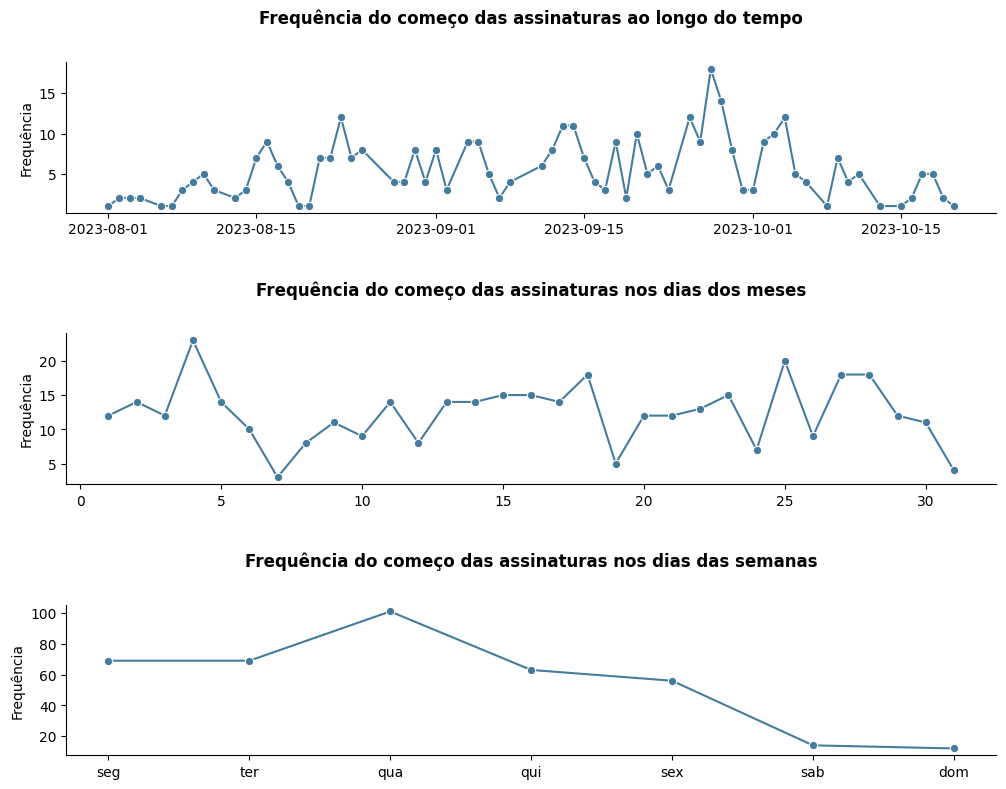

In [46]:
# Criando uma Series com o formato data.
date_counts = df_subscriptions['SUBSCRIPTION_START_DATE'].dt.date
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9))
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Frequência')
ax1.set_title('Frequência do começo das assinaturas ao longo do tempo', fontsize=12, fontweight='bold', y=1.2)
sns.despine(right=True)

# Criando uma Series com o formato data.
date_counts = df_subscriptions['SUBSCRIPTION_START_DATE'].dt.day
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Frequência')
ax2.set_title('Frequência do começo das assinaturas nos dias dos meses', fontsize=12, fontweight='bold', y=1.2)
sns.despine(right=True)

# Criando uma Series com o formato data.
date_counts = df_subscriptions['SUBSCRIPTION_START_DATE'].dt.weekday
# Contando as frequências
date_counts = date_counts.value_counts().sort_index()

# Plotando
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', ax=ax3)
ax3.set_xlabel('')
ax3.set_xticks(ticks=[0,1,2,3,4,5,6], labels=['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom'])
ax3.set_ylabel('Frequência')
ax3.set_title('Frequência do começo das assinaturas nos dias das semanas', fontsize=12, fontweight='bold', y=1.2)
sns.despine(right=True)

plt.subplots_adjust(hspace=0.8)
plt.show()

Os gráficos não mostram um padrão bem definido.

#### `SUBSCRIPTION_STATUS`

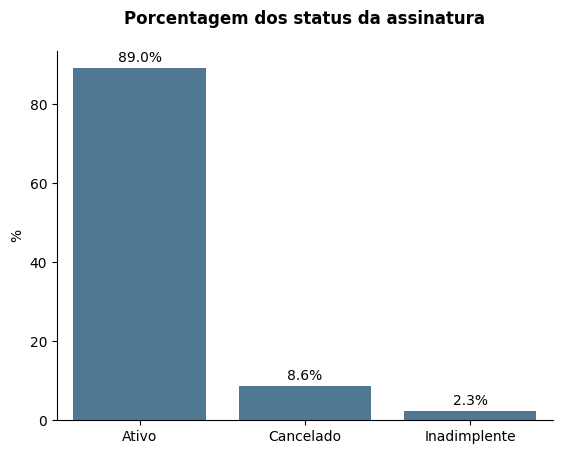

In [47]:
percentages = df_subscriptions['SUBSCRIPTION_STATUS'].value_counts(normalize=True) * 100

# Plotando
ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.title('Porcentagem dos status da assinatura', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('%')
plt.xticks(ticks=[0,1,2], labels=['Ativo', 'Cancelado', 'Inadimplente'])

# Inserindo os valores acima das barras
for index, value in enumerate(percentages):
    plt.text(index, value + 1.5, f'{value:.1f}%', ha='center')

sns.despine(right=True)
plt.show()

O gráfico acima nos informa que temos 8,6% de churn e 2,3% das faturas estão inadimplentes.

#### `BILLING_INTERVAL_IN_MONTHS`

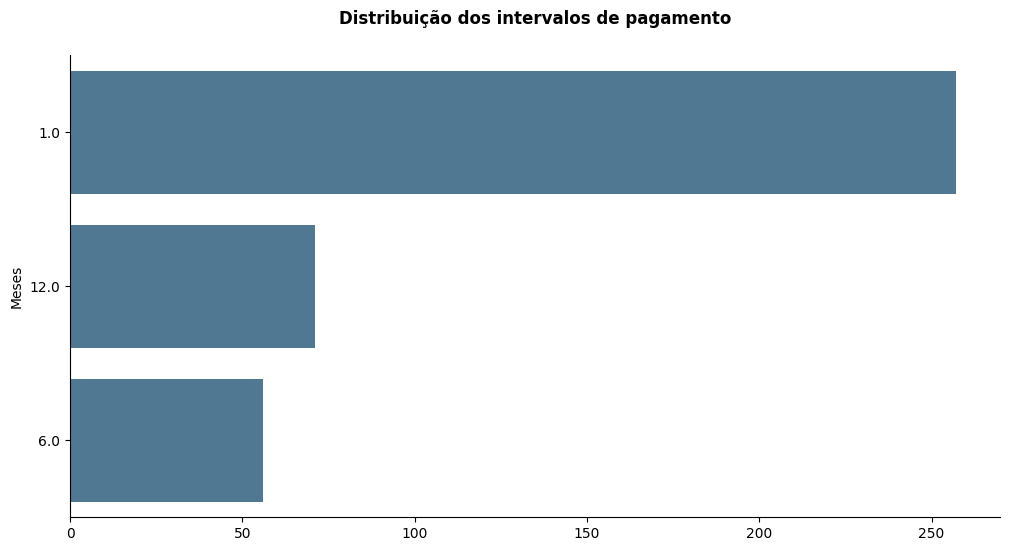

In [48]:
# Criando uma serie ordenada
order = df_subscriptions['BILLING_INTERVAL_IN_MONTHS'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_subscriptions, y='BILLING_INTERVAL_IN_MONTHS', order=order)
plt.title('Distribuição dos intervalos de pagamento', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('Meses')

sns.despine(right=True)
plt.show()

O intervalo de pagamento mensal é a preferência de nossos clientes.

#### `FIRST_PAYMENT_METHOD_TYPE`

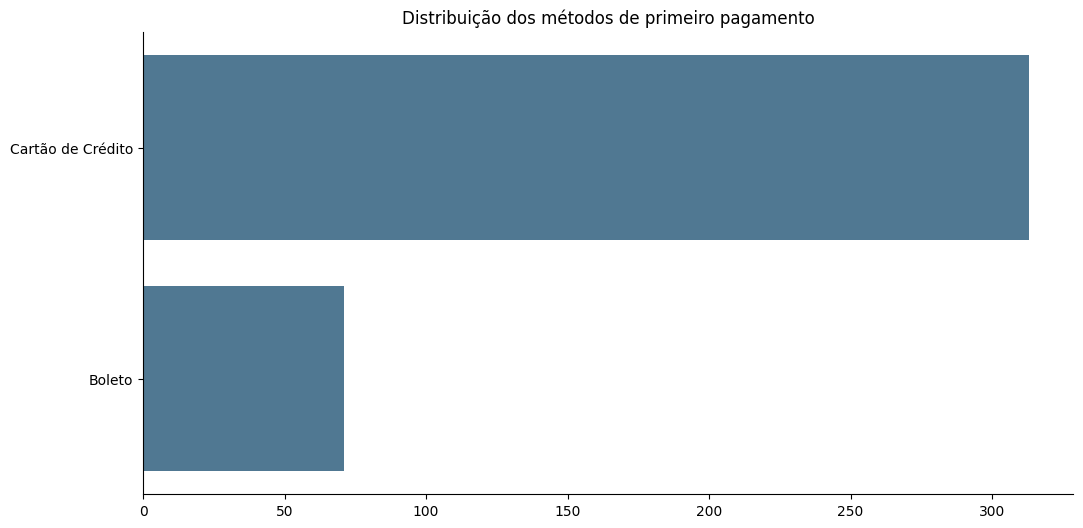

In [49]:
# Criando uma serie ordenada
order = df_subscriptions['FIRST_PAYMENT_METHOD_TYPE'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_subscriptions, y='FIRST_PAYMENT_METHOD_TYPE')
plt.title('Distribuição dos métodos de primeiro pagamento')
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

A maioria de nossos clientes escolhem o cartão de crédito como método de primeiro pagamento.

#### `FIRST_CARD_BRAND`

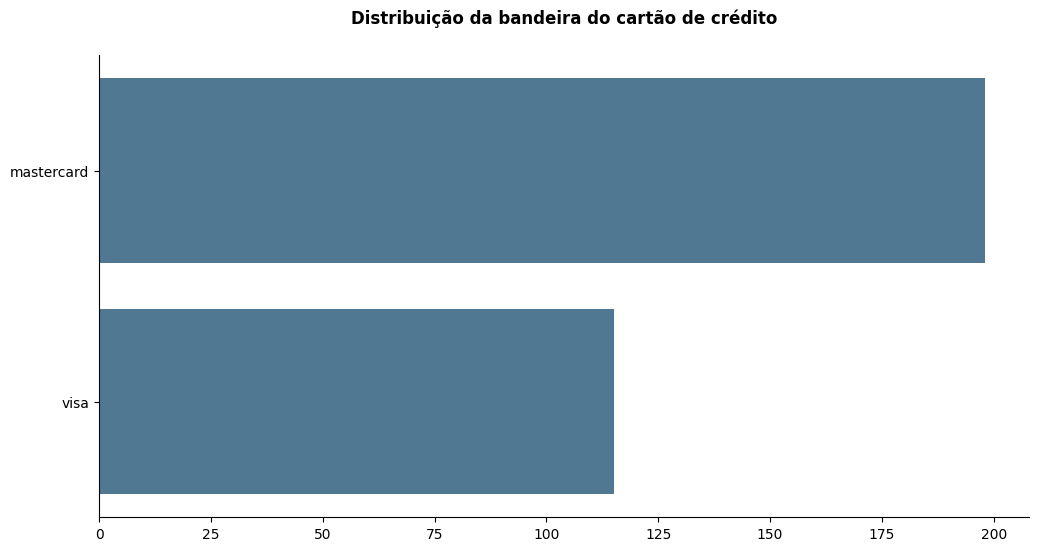

In [50]:
# Criando uma serie ordenada
order = df_subscriptions['FIRST_CARD_BRAND'].value_counts().index

# Plotando
plt.figure(figsize=(12,6))
sns.countplot(df_subscriptions, y='FIRST_CARD_BRAND')
plt.title('Distribuição da bandeira do cartão de crédito', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('')
plt.ylabel('')

sns.despine(right=True)
plt.show()

Mastercard é a bandeira mais utilizado nos cartões de crédito.

#### `FIRST_PAYMENT_AMOUNT`

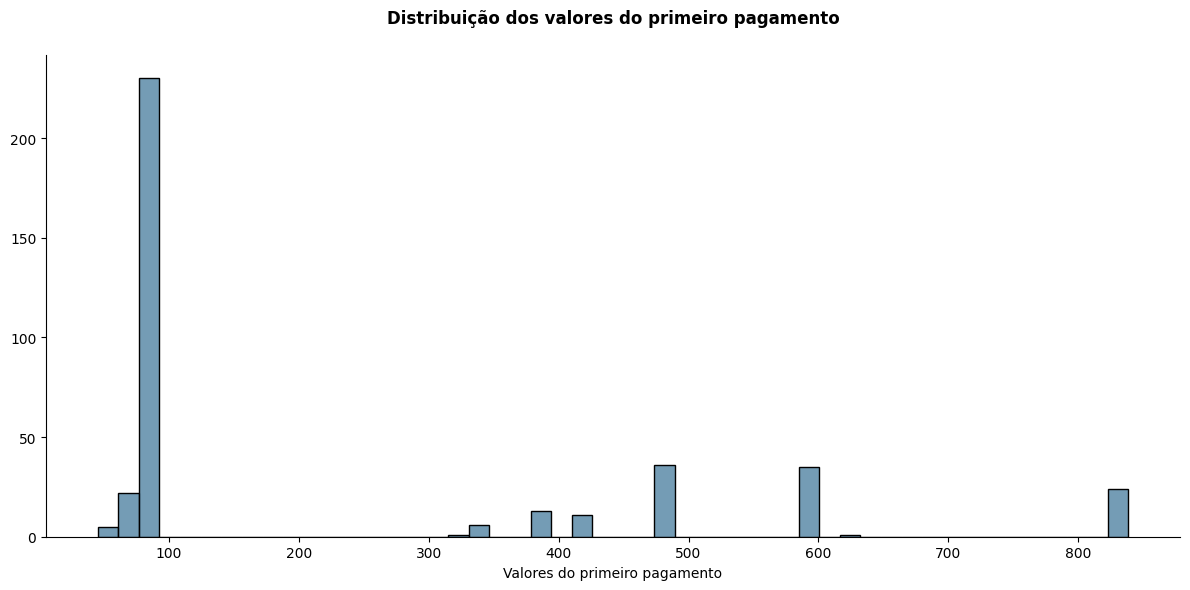

In [51]:
# Plotando
plt.figure(figsize=(12,6))
sns.histplot(df_subscriptions, x='FIRST_PAYMENT_AMOUNT', bins=50)
plt.title('Distribuição dos valores do primeiro pagamento', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('Valores do primeiro pagamento')
plt.ylabel('')

sns.despine(right=True)
plt.tight_layout()
plt.show()

In [52]:
df_subscriptions['FIRST_PAYMENT_AMOUNT'].describe()

count    384.000000
mean     241.678958
std      238.445196
min       44.950000
25%       89.900000
50%       89.900000
75%      434.400000
max      838.800000
Name: FIRST_PAYMENT_AMOUNT, dtype: float64

Podemos observar que 50% (mediana) dos valores cobrados são de R$ 89,90, o que pode indicar o preço padrão para o valor mensal, a preferencia de nossas clinicas. Os valores minimos cobrado no primeiro pagamendo foi de R$ 44,95, indicando algum desconto de 50%, e os valores acima do preço padrão são os pagamentos cobrados em 6 e 12 meses e suas variações com descontos.

---
---

Feito as análises e tratamento da tabela, vamos carrega-la em outro arquivo para criar-mos nosso dashboard.

In [53]:
# Guardando os ID's das clinicas de rede
id_to_drop = df_clinics[df_clinics['BUSINESS_SEGMENTATION'] == 'Rede Homologada']['CLINIC_ID']

# Retirando as grandes redes e franquias de clínicas.
df_clinics = df_clinics[~df_clinics['CLINIC_ID'].isin(id_to_drop)]
df_activity = df_activity[~df_activity['CLINIC_ID'].isin(id_to_drop)]
df_subscriptions = df_subscriptions[~df_subscriptions['CLINIC_ID'].isin(id_to_drop)]

# Criando novo diretório para as tabelas tratadas
os.makedirs('./data/processed', exist_ok=True)

# Salvando as tabelas tratadas
caminho = f'./data/processed/'
df_clinics.to_excel(f'{caminho}df_clinics_clean.xlsx', index=False)
df_activity.to_excel(f'{caminho}df_activity_clean.xlsx', index=False)
df_subscriptions.to_excel(f'{caminho}df_subscriptions_clean.xlsx', index=False)